In [291]:
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer as timer
import math

In [292]:
np.random.seed(1000)


In [293]:
A = np.random.randn(1000,10)

In [294]:
x_bar = np.zeros(10).reshape(10,1)

In [295]:
np.random.seed(100)

In [296]:

for i in range(0,10,2):
  x_bar[i] = np.random.uniform(-i-2,-i-1)
  print(x_bar[i])
for j in range(1,10,2):
  x_bar[j] = np.random.uniform(j+1,j+2)
  print(x_bar[j])

[-1.45659506]
[-3.72163061]
[-5.57548241]
[-7.15522387]
[-9.99528114]
[2.12156912]
[4.67074908]
[6.82585276]
[8.13670659]
[10.57509333]


In [297]:
np.random.seed(1000)

In [298]:
eps = np.random.randn(1000).reshape(1000,1)

In [299]:
y = np.matmul(A,x_bar) + eps



In [300]:
def evalf(x):
  assert type(x) is np.ndarray
  f_x = np.linalg.norm(np.matmul(A,x) - y )
  f_x = 0.5*((f_x)**2)
  return f_x


In [301]:
def evalg(x):
  assert type(x) is np.ndarray
  return np.matmul(A.T, np.matmul(A, x) - y)

In [302]:
def evalh(x):
  assert type(x) is np.ndarray
  return np.matmul(A.T,A)

In [303]:
def compute_steplength_backtracking_scaled_direction(x, gradf, direction, alpha_start, rho, gamma):
  assert type(x) is np.ndarray
  assert type(gradf) is np.ndarray
  assert type(direction) is np.ndarray
  assert type(alpha_start) is float and alpha_start>=0.
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0.
  
  alpha = alpha_start
  while evalf(x+alpha*direction)>evalf(x)+gamma*alpha*np.matmul(gradf.T,direction):
    alpha=rho*alpha

  return alpha

In [304]:
def find_minimizer_newtons(start_x, tol, *args):
  assert type(start_x) is np.ndarray 
  assert type(tol) is float and tol>=0 

  x = start_x
  n = x.shape[0]
  g_x = evalg(x)

  x_k_nums =[]

  alpha_start = args[0]
  rho = args[1]
  gamma = args[2]

  k=0
  while (np.linalg.norm(g_x) > tol):
    D_k = np.linalg.inv(evalh(x))
    p_k = -np.matmul(D_k, g_x)
    step_length = compute_steplength_backtracking_scaled_direction(x, g_x, p_k, alpha_start, rho, gamma)
  
    x = np.add(x,np.multiply(step_length,p_k))
    x_k_nums.append(x)
    k += 1 
    g_x = evalg(x)
  return x, evalf(x), k, x_k_nums

In [305]:
time_start_1 = timer()
minimizer_1,fn_1,iter_1, x_k_num_1 = find_minimizer_newtons(np.zeros(10).reshape(10,1), 1e-5, 0.99, 0.5, 0.5)
time_end_1   = timer()

In [306]:
print("x* = ",minimizer_1 )

x* =  [[-1.4778639 ]
 [ 2.14763688]
 [-3.7074727 ]
 [ 4.67313568]
 [-5.51661016]
 [ 6.81938771]
 [-7.1636759 ]
 [ 8.16750016]
 [-9.9571144 ]
 [10.65573738]]


In [307]:
print("x_bar",x_bar)

x_bar [[-1.45659506]
 [ 2.12156912]
 [-3.72163061]
 [ 4.67074908]
 [-5.57548241]
 [ 6.82585276]
 [-7.15522387]
 [ 8.13670659]
 [-9.99528114]
 [10.57509333]]


In [308]:
new = []
for i in range(iter_1 - 1):
  new.append(math.log(np.linalg.norm(x_k_num_1[i]-minimizer_1)))


In [309]:
iteration = []
for i in range(iter_1 - 1):
  iteration.append(i + 1)

Text(0, 0.5, 'log(||x_k-x*||)')

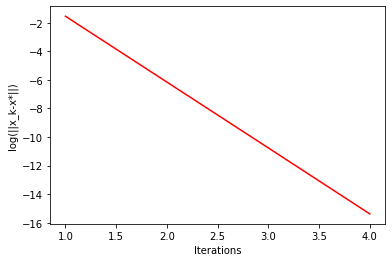

In [310]:
plt.plot(iteration,new,color = "r")
plt.xlabel('Iterations')
plt.ylabel('log(||x_k-x*||)')

In [311]:
new_1 = []
for i in range(iter_1 - 1):
  new_1.append(math.log(np.linalg.norm(evalf(x_k_num_1[i])-evalf(minimizer_1))))


In [312]:
iteration_1 = []
for i in range(iter_1 - 1):
  iteration_1.append(i + 1)

Text(0, 0.5, 'log(||f(x_k)-f(x*)||)')

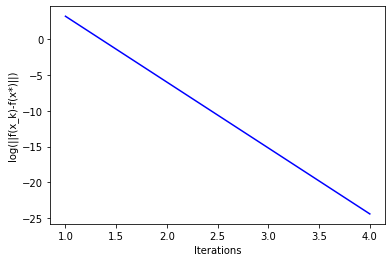

In [313]:
plt.plot(iteration_1,new_1,color = "b")
plt.xlabel('Iterations')
plt.ylabel('log(||f(x_k)-f(x*)||)')


#here observing the graph we can observe that function is goes on decreasing and in the linear form.
#using the definition of convegence of Q Linear  fraction of function is goes on decreasing as the value of the norm in the the function convegers to zero. so here also function goes on decreasing.

In [314]:
#code for BFGS method to find the minimizer
def find_minimizer_BFGS(start_x, tol, B_k, *args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 

  n = len(start_x)
  x = start_x.reshape((n,1))
  g_x = evalg(x)
  x_k_num=[]
  #initialization for backtracking line search
  alpha_start = args[0]
  rho = args[1]
  gamma = args[2]

  k=0
  while (np.linalg.norm(g_x) > tol):
    p_k = -np.matmul(B_k, g_x)
    step_length = compute_steplength_backtracking_scaled_direction(x, g_x, p_k, alpha_start, rho, gamma)

    x_k = x
    s_k = np.multiply(step_length,p_k)
    #x = np.add(x, np.multiply(step_length,p_k)) #update x = x + step_length*direction
    x = np.add(x, s_k)#s_k = x - x_k
    y_k = evalg(x)-evalg(x_k)
    s_yT = np.matmul(s_k,y_k.T)
    y_sT = np.matmul(y_k, s_k.T)
    u_k = 1/(np.matmul(y_k.T,s_k))
    term_11 = np.subtract(np.identity(n) , u_k*s_yT)
    term_13 = np.subtract(np.identity(n) , u_k*y_sT)
    B_k = np.matmul(term_11,np.matmul(B_k,term_13)) + u_k*np.matmul(s_k,s_k.T)
    
    x_k_num.append(x)
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point

  return x, evalf(x), k, x_k_num

In [315]:
B_k = np.identity(10)/10

time_start_2 = timer()
minimizer_2,fn_2,iter_2,x_k_num_2 = find_minimizer_BFGS(np.zeros(10).reshape(10,1), 1e-5, B_k, 0.99, 0.5, 0.5)
time_end_2   = timer()

In [316]:
print("x*",minimizer_2)

x* [[-1.4778639 ]
 [ 2.14763688]
 [-3.7074727 ]
 [ 4.67313568]
 [-5.51661016]
 [ 6.81938771]
 [-7.1636759 ]
 [ 8.16750016]
 [-9.9571144 ]
 [10.65573738]]


In [317]:
print("x_bar",x_bar)

x_bar [[-1.45659506]
 [ 2.12156912]
 [-3.72163061]
 [ 4.67074908]
 [-5.57548241]
 [ 6.82585276]
 [-7.15522387]
 [ 8.13670659]
 [-9.99528114]
 [10.57509333]]


In [318]:
new_2 = []
for i in range(iter_2 - 1):
  new_2.append(math.log(np.linalg.norm(x_k_num_2[i]-minimizer_2)))

iteration_2 = []
for i in range(iter_2 - 1):
  iteration_2.append(i)

Text(0, 0.5, 'log(||(x_k)-(x*)||)')

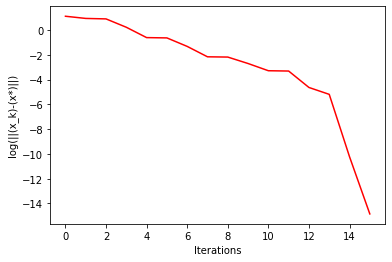

In [319]:
plt.plot(iteration_2,new_2,color = "r")
plt.xlabel('Iterations')
plt.ylabel('log(||(x_k)-(x*)||)')

In [320]:
new_3 = []
for i in range(iter_2 - 1):
  new_3.append(math.log(np.linalg.norm(evalf(x_k_num_2[i])-evalf(minimizer_2))))

iteration_3 = []
for i in range(iter_2 - 1):
  iteration_3.append(i)

Text(0, 0.5, 'log(||f(x_k)-f(x*)||)')

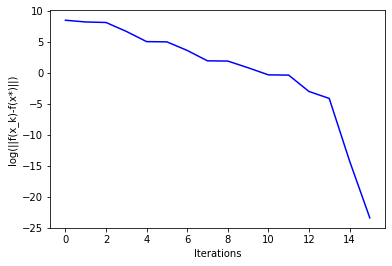

In [321]:
plt.plot(iteration_3,new_3,color = "b")
plt.xlabel('Iterations')
plt.ylabel('log(||f(x_k)-f(x*)||)')

#Here function is eventually  decreasing as the iteration increases. using the definition of convergence function fraction is in between 0 to 1. so here rate will be in (0,1).

In [322]:
print("time taken by newton method", time_end_1-time_start_1)

time taken by newton method 0.003929688000425813


In [323]:
print("time taken by BFGS method",time_end_2 -time_start_2)

time taken by BFGS method 0.025917838000168558


# Here we can see that newton's method takes very less time that BFGS mehtod.